# 2D Convolution and Convoltional Layers

In this demo, you will learn to:
* Compute 2D convolutions on images using `scipy`.
* Visualize the outputs of convolutions
* Create a convolutional layer in Keras
* Mathematically describe the weights with multiple input and output channels

## Loading and Displaying Images

We first import several packages.  Two important packages we will use are: 
* `scipy.signal`: sub-package which has useful routines for 2D convolutions; and
* `skimage.data`: sub-package for getting some basic images.

In [1]:
import numpy as np
import scipy.signal
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline

We next create a function to display images that we will use throughout the demo.  The function does both gray-scale and color images.

In [2]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

The `skimage.data` package has several commonly used images in image processing.  We begin by loading a widely-used "cameraman" image.  

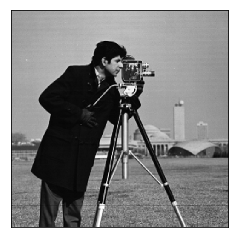

In [3]:
im = skimage.data.camera()
disp_image(im)

We print the image shape

In [4]:
print("The image shape is: "+str(im.shape))

The image shape is: (512, 512)


We can also load images from files using the `skimage.io.imread` function.  This function can handle most common image formats including, for example, JPG.

The image shape is: (368, 487, 3)


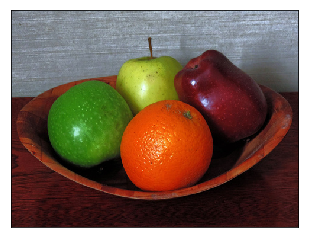

In [5]:
fname = 'still_life.jpg'
im_color = skimage.io.imread(fname)
disp_image(im_color)
print("The image shape is: "+str(im_color.shape))

## Performing 2D Convolutions

To illustrate 2D convolution, we first apply an averaging filter, which essentially replaces each pixel by the average of a neighborhood of KxK pixels to the top left of the current pixel. Filtering an image with this filter has a smoothing effect, which can be useful as a crude noise removal filter. We use this filter to first illustrate the effect of using different output options in convolve2D.

Text(0.5,1,'Uniform kernel, Valid')

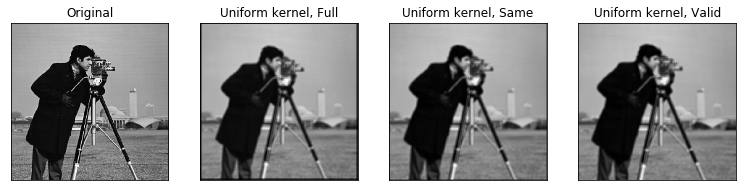

In [6]:
kx = 9
ky = 9
sig = 3
G_unif = np.ones((kx,ky))/(kx*ky)
im_unif_full = scipy.signal.convolve2d(im, G_unif, mode='full')
im_unif_same = scipy.signal.convolve2d(im, G_unif, mode='same')
im_unif_valid = scipy.signal.convolve2d(im, G_unif, mode='valid')

# Plot the original image and the three outputs
plt.figure(figsize=(13,13))
plt.subplot(1,4,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,4,2)
disp_image(im_unif_full)
plt.title('Uniform kernel, Full')
plt.subplot(1,4,3)
disp_image(im_unif_same)
plt.title('Uniform kernel, Same')
plt.subplot(1,4,4)
disp_image(im_unif_valid)
plt.title('Uniform kernel, Valid')

Let us look at the image sizes. Let K represent filter width, Ni image width, No output width. With "full", No = Ni+K-1, with "same", No=Ni; with ``valid``, No=Ni-K+1.

In [7]:
print("Input shape = " + str(im.shape))
print("Output shape (Full) = " + str(im_unif_full.shape))
print("Output shape (Same) = " + str(im_unif_same.shape))
print("Output shape (valid) = " + str(im_unif_valid.shape))

Input shape = (512, 512)
Output shape (Full) = (520, 520)
Output shape (Same) = (512, 512)
Output shape (valid) = (504, 504)


Now let us take a closer look at the output near the boundaries

Text(0.5,1,'Uniform kernel, Valid')

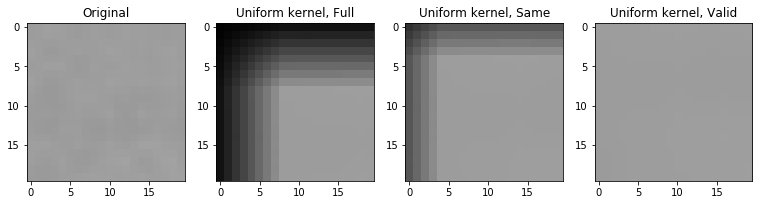

In [8]:
# Plot the original image and the three outputs at the top left corner
plt.figure(figsize=(13,13))
plt.subplot(1,4,1)
plt.imshow(im[0:20,0:20], vmin=0, vmax=255, cmap='gray')
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(im_unif_full[0:20,0:20], vmin=0, vmax=255, cmap='gray')
plt.title('Uniform kernel, Full')
plt.subplot(1,4,3)
plt.imshow(im_unif_same[0:20,0:20], vmin=0, vmax=255, cmap='gray')
plt.title('Uniform kernel, Same')
plt.subplot(1,4,4)
plt.imshow(im_unif_valid[0:20,0:20], vmin=0, vmax=255, cmap='gray')
plt.title('Uniform kernel, Valid')

Now let us look at the effect of increasing the average window size. As we can see, the larger is K, the more bluured the image becomes.

Text(0.5,1,'Uniform kernel, 15x15')

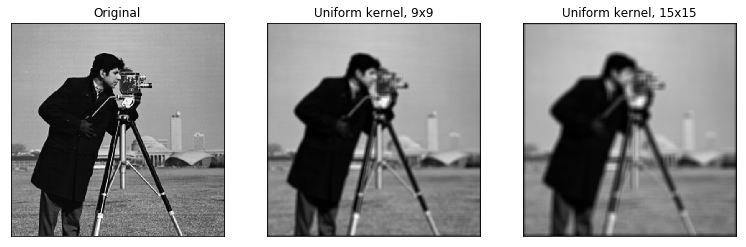

In [9]:
kx = 9
ky = 9

G_unif = np.ones((kx,ky))/(kx*ky)
im_unif_9 = scipy.signal.convolve2d(im, G_unif, mode='same')
kx = 15
ky = 15
G_unif = np.ones((kx,ky))/(kx*ky)
im_unif_15 = scipy.signal.convolve2d(im, G_unif, mode='same')

# Plot the original image and the three outputs
plt.figure(figsize=(13,13))
plt.subplot(1,3,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,3,2)
disp_image(im_unif_9)
plt.title('Uniform kernel, 9x9')
plt.subplot(1,3,3)
disp_image(im_unif_15)
plt.title('Uniform kernel, 15x15')

Compared to the averaging filter, the Gaussian kernel also performs an averaging, but weights the pixels at the center of the kernel more. You can control the bluring strength with the standard deviation sigma of the Gaussian kernel. Window size should generally be larger than 2 sigma.

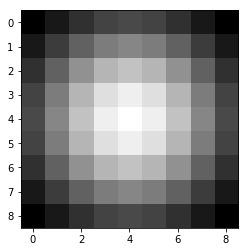

In [10]:
def gauss_kernel(nx,ny,sig):
    """
    Creates a Gaussian kernel of size (nx,ny) with std deviation sig
    """
    dxsq = (np.arange(nx)-(nx-1)/2)**2
    dysq = (np.arange(ny)-(ny-1)/2)**2
    dsq = dxsq[:,None] + dysq[None,:]
    G = np.exp(-0.5*dsq/(sig**2))
    G = G / np.sum(G)
    return G

# Create a uniform kernel
kx = 9
ky = 9
sig = 3
G_unif = np.ones((kx,ky))/(kx*ky)

# Create a Gaussian kernel
G_gauss = gauss_kernel(kx,ky,sig)
plt.imshow(G_gauss,interpolation='None',cmap='gray')

Now let us compare effect of averaging and Gaussian filtering, with different sizes

Text(0.5,1,'Gaussian kernel, 15x15')

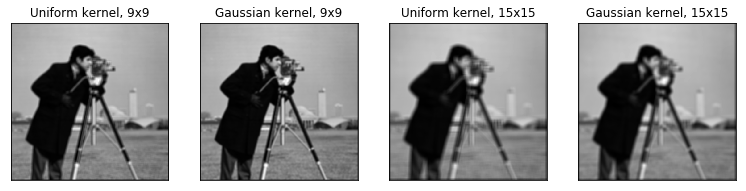

In [11]:

im_gauss_9= scipy.signal.convolve2d(im, G_gauss, mode='same')

kx = 15
ky = 15
sig = 6
# Create a Gaussian kernel
G_gauss = gauss_kernel(kx,ky,sig)
im_gauss_15= scipy.signal.convolve2d(im, G_gauss, mode='same')


plt.figure(figsize=(13,13))
plt.subplot(1,4,1)
disp_image(im_unif_9)
plt.title('Uniform kernel, 9x9')
plt.subplot(1,4,2)
disp_image(im_gauss_9)
plt.title('Gaussian kernel, 9x9')
plt.subplot(1,4,3)
disp_image(im_unif_15)
plt.title('Uniform kernel, 15x15')
plt.subplot(1,4,4)
disp_image(im_gauss_15)
plt.title('Gaussian kernel, 15x15')


In addtion to noise removal, a common use of convolution is edge detection by using a filter that approximates the operation of gradient in horizontal and vertical directions. One such filter set is called the [Sobel filters](https://en.wikipedia.org/wiki/Sobel_operator), `Gx` and `Gy`.  The filter `Gx` filter will have a large response when there is a large change in the x-direction (vertical edge).  Similarly, `Gy` will have a large response for a large change in the image in the y-direction (horizontal edge).   In any part of the image that is flat, the output is zero. Without filter reversal, the response is positive if the change is from black to white.

In [15]:
Gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])  # Gradient operator in the x-direction
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])  # Gradient operator in the y-direction

Text(0.5,1,'Gy * image')

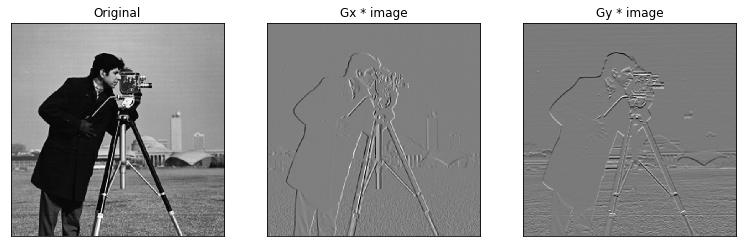

In [16]:
# Perform the convolutions
imx = scipy.signal.convolve2d(im, Gx, mode='valid')
imy = scipy.signal.convolve2d(im, Gy, mode='valid')

# Plot the original image and the two outputs
plt.figure(figsize=(13,13))
plt.subplot(1,3,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,3,2)
disp_image(imx)
plt.title('Gx * image')
plt.subplot(1,3,3)
disp_image(imy)
plt.title('Gy * image')

Now let us see the result with the flipped filter. As can be seen, with filter reversal, the response is positive if the change is from white to black. This is in fact the result of correlating the filter mask with the local neighborhood.

(510, 510)


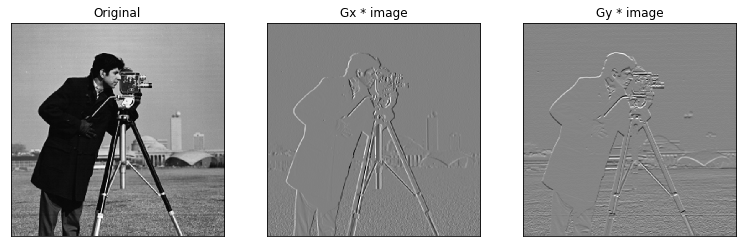

In [17]:
Gxflip = np.fliplr(np.flipud(Gx))
Gyflip = np.fliplr(np.flipud(Gy))

imx = scipy.signal.convolve2d(im, Gxflip, mode='valid')
imy = scipy.signal.convolve2d(im, Gyflip, mode='valid')

# Plot the original image and the two outputs
plt.figure(figsize=(13,13))
plt.subplot(1,3,1)
disp_image(im)
plt.title('Original')
plt.subplot(1,3,2)
disp_image(imx)
plt.title('Gx * image')
plt.subplot(1,3,3)
disp_image(imy)
plt.title('Gy * image')
print(imx.shape)

## Implementing a Convolutional Layer in Keras

We now show how to implement a convolutional layer in Keras.  Typically, in Keras, images are represented as 4-th order tensors with dimensions `(batch_size,height,width,nchannels)`, where `batch_size` is the number of images in a batch, `(height,width)` is the images size per channel and `nchannels` is the number of image channels.  For BW images, there is only one channel. We first reshape the image to this format.

In [56]:
nrow, ncol = im.shape 
nimage = 1         # number of images in batch
nchan_in = 1       # number of input channels.  1 since it is BW
input_shape = (nrow,ncol,nchan_in)  # input shape of 1 image
batch_shape = (nimage,nrow,ncol,nchan_in)  # shape of image batch
x = im.reshape(batch_shape)

Next, we import the appropriate Keras packages.  

In [57]:
import keras
from keras.models import Model, Sequential, Input
from keras.layers import Conv2D
import keras.backend as K

We now create a simple network with one convolutional layer and two output channels.

In [58]:
K.clear_session()
model = Sequential()
kernel_size = Gx.shape
nchan_out = 2
model.add(Conv2D(input_shape=input_shape,filters=nchan_out,
                 kernel_size=kernel_size,name='conv2d'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 2)       20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


The weights are represented as a `(3,3,1,2)` which correspond to `(krow,kcol,nchan_in,nchan_out)`.  Thus, for each input and output channel pair, there is one kernel of size `(krow,kcol)`. The bias has size `(nchan_out,)` corresponding to one bias value per output channel.

In [60]:
layer = model.get_layer('conv2d')
W, b = layer.get_weights()
print("W shape = " + str(W.shape))
print("b shape = " + str(b.shape))

W shape = (3, 3, 1, 2)
b shape = (2,)


We set the two filters using the Sobel filters `Gx` and `Gy`.  

In [61]:
W[:,:,0,0] = Gx
W[:,:,0,1] = Gy
b = np.zeros(nchan_out)
layer.set_weights((W,b))

We can now run the image through the convolutional layer and display the outputs.  We can see that it produces the same outputs as we did earlier using convolve2D function, when we flipped the filters. This is because the convolution inside the Tensorflow actually implements "correlation". Also, the output image size with the default setting is equivalent to using the `valid` option.

Note that you can choose to use other boundary treatment by setting the ``padding`` option properly:

*model.add(Conv2D(input_shape=input_shape,filters=nchan_out,
                 kernel_size=kernel_size,name='conv2d', padding='same'))*

In [62]:
x = im.reshape(batch_shape)
y = model.predict(x)

(510, 510)


Text(0.5,1,'chan 1 out')

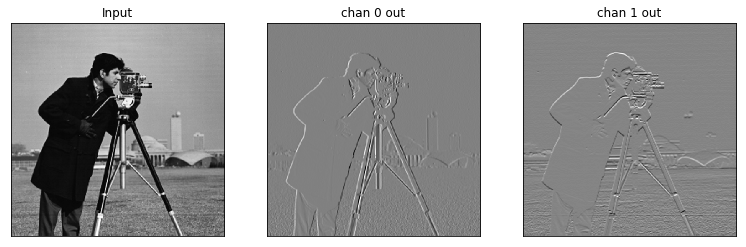

In [63]:
# Plot the original image and the two outputs
chan0=y[0,:,:,0];
chan1=y[0,:,:,1];

plt.figure(figsize=(13,13))
plt.subplot(1,3,1)
disp_image(im)
plt.title('Input')
plt.subplot(1,3,2)
disp_image(chan0)
plt.title('chan 0 out')
plt.subplot(1,3,3)
disp_image(chan1])
plt.title('chan 1 out')

print(chan0.shape)

## Using Multiple Input and Output Channels

We now create a keras model with a single convolutional layer to process the color image.  We first get the dimensions of the color image.

Image shape is (368, 487, 3)


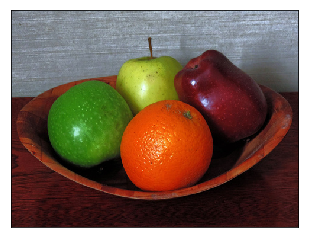

In [47]:
disp_image(im_color)
nrow,ncol,nchan_in = im_color.shape
nimage = 1
input_shape = (nrow,ncol,nchan_in)
batch_shape = (nimage,nrow,ncol,nchan_in)
print("Image shape is "+str(im_color.shape))

# Reshape image to a batch
x = im_color.reshape(batch_shape)

We now create a network with a single convolutional layer with `nchan_out=4` output channels.

In [48]:
# Dimensions
nchan_out = 4
kernel_size = (9,9)

# Create network
K.clear_session()
model = Sequential()
model.add(Conv2D(input_shape=input_shape,filters=nchan_out,
                 kernel_size=kernel_size,name='conv2d'))

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 360, 479, 4)       976       
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________


Check: The number of parameters for each output channel is nchan_in  kernel_size +1 (bias). The total number for nchan_out is then nchan_out (nchan_in  kernel_size+1)=4 (3 81+1)=976!

As before, the weight matrix is of size `(krow,kcol,nchan_in,nchan_out)` so that there is one kernel of size `(krow,kcol)` per input-output channel pair.

In [50]:
layer = model.get_layer('conv2d')
W, b = layer.get_weights()
print(W.shape)
print(b.shape)

(9, 9, 3, 4)
(4,)


To illustrate the 2D convolutions, we create kernels of the form:

    W[a,b,i,j] = G[a,b]*color_wt[j,i]
    
where `color_wt[i,j]` represents the weighting of color channel `i` for output channel `j` and `G[:,:]` is a uniform kernel over space.

In [51]:
# Color weights
color_wt = np.array([
    [1,    -0.5, -0.5],   # Sensitive to red
    [-0.5,    1, -0.5],   # Sensitive to green
    [-0.5, -0.5,    1],   # Sensitive to blue
    [ 0.5,   -1,  0.5],   # Sensitive to red-blue mix
])

# Gaussian kernel over space
krow, kcol = kernel_size
G = gauss_kernel(krow,kcol,sig=2)

# Multiply by weigthing color
W = G[:,:,None,None]*color_wt.T[None,None,:,:]
b = np.zeros(b.shape)
layer.set_weights((W,b))

We plot the filters.  The filter for each output channel is itself a small RGB image and indicates which local feature it is sensitive to.

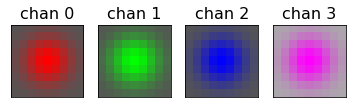

In [52]:
for i in range(nchan_out):
    plt.subplot(1,nchan_out,i+1)
    disp_image(W[:,:,:,i])
    title_str = 'chan %d' % i
    plt.title(title_str,fontsize=16)

We now run the image through the network.  We see that the output feature maps clearly indicate the different colors.

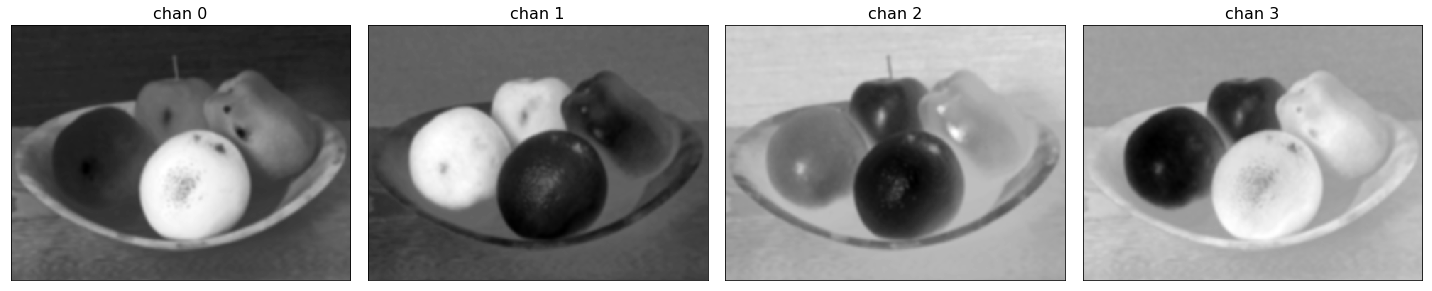

In [53]:
y = model.predict(x)
plt.figure(figsize=(20,20))
for i in range(nchan_out):
    plt.subplot(2,nchan_out,i+1)
    disp_image(y[0,:,:,i])
    title_str = 'chan %d' % i
    plt.title(title_str,fontsize=16)
plt.tight_layout()